In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import random

# Generating sample data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.90, random_state=0)

# Reinforcement learning based K-means clustering
class RLKMeansClustering:
    def __init__(self, n_clusters, n_actions=3, learning_rate=0.1, epsilon=0.1, gamma=0.9):
        self.n_clusters = n_clusters
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.gamma = gamma
        self.q_table = np.zeros((n_clusters, n_actions))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state, :])
        self.q_table[state, action] += self.learning_rate * (target - predict)

    def fit(self, X):
        kmeans = KMeans(n_clusters=self.n_clusters)
        kmeans.fit(X)
        labels = kmeans.labels_

        for _ in range(100):  # Number of iterations
            for i in range(len(X)):
                current_state = labels[i]

                action = self.choose_action(current_state)

                # Perturb action
                new_center = kmeans.cluster_centers_[current_state] + np.random.normal(0, 0.1, size=X.shape[1])

                new_labels = labels.copy()
                new_labels[i] = np.argmin(np.linalg.norm(new_center - kmeans.cluster_centers_, axis=1))

                new_state = new_labels[i]

                reward = -np.linalg.norm(X[i] - kmeans.cluster_centers_[current_state]) + np.linalg.norm(X[i] - new_center)

                self.update_q_table(current_state, action, reward, new_state)

                labels = new_labels

        return kmeans

# Example usage
rl_kmeans = RLKMeansClustering(n_clusters=4)
kmeans_model = rl_kmeans.fit(data)

print("Final cluster centers:")
print(kmeans_model.cluster_centers_)


Final cluster centers:
[[-1.57553756  2.79999831]
 [-1.45052775  7.78696146]
 [ 1.98345909  0.85592657]
 [ 0.91296517  4.54286627]]


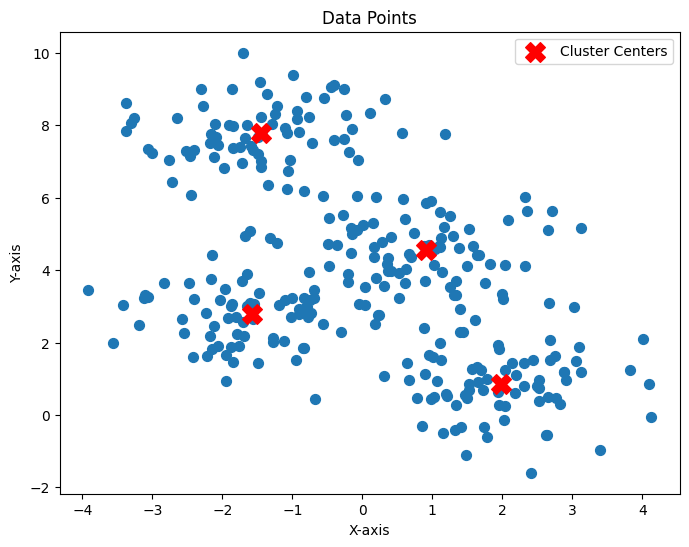

In [9]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.title('Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Adding cluster centers
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.legend()
plt.show()
